In [52]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def epsilon_greedy_policy(q_function, state, eps):
    """
    Return a action according to Q-function
    """

    if np.random.uniform() > eps:
        return np.argmax(q_function[state]) # optimal action
    else:
        return np.random.choice(len(q_function[state])) # random action

In [73]:
def sarsa(env, policy = epsilon_greedy_policy, episodes = 200000, discount = 1, alpha = 0.01, epsilon = 0.1):
    """
    Apply sarsa method
    
    Return:
        q_function: Q-funciton (np.array (nS, nA))
        accumulate_reward_per_episode: record the accumulative rewards of episodes for plotting (list)
    """
    

    q_function = np.random.rand(env.nS, env.nA)
    # q_function = np.zeros((env.nS, env.nA))
    
    accumulate_reward_per_episode = [] # for plot
    accumulate_reward = 0
    
    for i in range(episodes):
        
        state = env.reset()
        action = policy(q_function, state, epsilon)
        
        for t in range(10000):
            next_state, reward, done, _ = env.step(action)
            next_action = policy(q_function, next_state, epsilon)
            
            td_target = reward + discount * q_function[next_state][next_action]
            td_error = td_target - q_function[state][action]
            q_function[state][action] += alpha * td_error
            
            accumulate_reward += reward # for plot
            
            if done:
                break
            
            action = next_action
            state = next_state

        accumulate_reward_per_episode.append(accumulate_reward)
        
    return q_function, accumulate_reward_per_episode
            

In [74]:
env = gym.make('FrozenLake-v1')

In [75]:
q, r = sarsa(env)

In [76]:
value = np.zeros(env.nS)
for i in range(env.nS):
    value[i] = np.max(q[i])

In [81]:
print(np.argmax(q, axis = 1).reshape(4, 4))
print(value.reshape(4,4))

print("-" * 15, "ENV", "-" * 15)
env.reset()
env.render()
env.close()

[[0 3 3 3]
 [0 1 2 1]
 [3 1 0 1]
 [0 2 1 1]]
[[1.21855586 1.15164373 1.09623257 1.06584308]
 [1.24037808 0.73087344 1.01906529 0.65156487]
 [1.28729868 1.3761768  1.36944727 0.97438975]
 [0.92363721 1.49838118 1.69286707 0.91138634]]
--------------- ENV ---------------

SFFF
FHFH
FFFH
HFFG


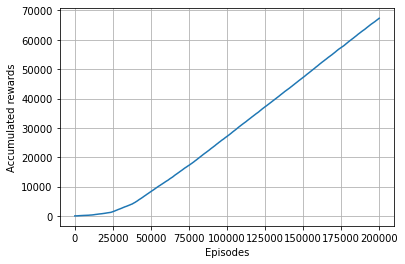

In [82]:
x = [i for i in range(len(r))]
y = r
plt.plot(x, y)
plt.xlabel("Episodes")
plt.ylabel("Accumulated rewards")
plt.grid()
plt.show()